# Cálculo de la energía generada por un aerogenerador

## Master en Energías Renovables. IMF

### Estudiante: Luis Alberto Andrade. Mayo 2022

Se dispone de un pequeño aerogenerador tripala instalado en una finca agropecuaria cuyas
características son las siguientes:

![tablaAerogenerador](2-CasoPractico4-tablaAerogenerador.jpg)

Se toma como densidad del aire media (no se consideran las ligeras variaciones que pudiera haber por
temperatura ambiente) 1,225 kg/m3.

El entorno donde se ubica el aerogenerador es un cultivo cerealista cercano a un pequeño bosque,
por lo que se toma como coeficiente de rugosidad α = 0,25.

![TablaRugosidad](2-CasoPractico4-tablaRugosidad.jpg)

Las velocidades de viento de un día medio registradas en una estación con anemómetro a 10 metros
de altura son las siguientes:

![VelocidadesViento](2-CasoPractico4-VelocidadesViento.jpg)

## Se pide:

* Realizar el ajuste de la velocidad de viento registrada en la estación acomodándola a la altura del aerogenerador y expresándola en m/s.

* Estimar la potencia correspondiente a cada velocidad de viento.

* Calcular la energía que se espera generar al día.

Para empezar vamos a importar los paquetes de Python que nos ayudarán a resolver este caso:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Los datos de velocidades de viento por franja horaria los tenemos en imagen, por lo que tendríamos que buscar la forma de convertirlas en cifras computables. En este caso vamos a tomar el camino de transcribir los datos de cada columna en listas, agruparlos en un diccionario Python y luego convertirlo a una tabla Pandas, que nos facilita la lectura y tratamiento de datos.

Otra alternativa es transcribir los datos en una hoja de cálculo, guardarlo como archivo xlsx o csv (formato más común) y luego importarlo a este notebook como una tabla Pandas

In [2]:
#Listas representando cada columna de la tabla de velocidad de viento por cada franja de una hora
Hora = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
Km_h = [6,7,6,10,15,20,23,30,27,32,40,45,50,43,35,28,24,20,18,15,10,9,9,8]

#Las agrupamos en un diccionario de Python que es equivalente a una tabla
Vientos = {Hora[i] : Km_h[i] for i in range(len(Hora))}

print(str(Vientos))

{0: 6, 1: 7, 2: 6, 3: 10, 4: 15, 5: 20, 6: 23, 7: 30, 8: 27, 9: 32, 10: 40, 11: 45, 12: 50, 13: 43, 14: 35, 15: 28, 16: 24, 17: 20, 18: 18, 19: 15, 20: 10, 21: 9, 22: 9, 23: 8}


Ya tenemos los datos importados en un diccionario que funciona como una tabla, pero nos ayudará mucho más tenerlo convertido a una tabla Pandas

In [3]:
#Convertimos el diccionario a una tabla (dataframe) Pandas que es mucho más amigable de leer
TablaVientos = pd.DataFrame(list(Vientos.items()), columns = ['Hora', 'Km/h'])

#Visualizamos todas las filas y columnas
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(TablaVientos)

    Hora  Km/h
0      0     6
1      1     7
2      2     6
3      3    10
4      4    15
5      5    20
6      6    23
7      7    30
8      8    27
9      9    32
10    10    40
11    11    45
12    12    50
13    13    43
14    14    35
15    15    28
16    16    24
17    17    20
18    18    18
19    19    15
20    20    10
21    21     9
22    22     9
23    23     8


## Calcular velocidades en m/s a la altura planeada del aerogenerador

Primero comenzamos convirtiendo las velocidades suministradas de Km/h a m/s, ya que con estas velocidades convertidas podremos hacer los cálculos posteriores, en tre ellos el de extrapoolar a la altura deseada. Como sabemos 1 Km/h es igual a 1000m / 3600s. Por lo tanto, a nuestras velocidades en Km/h tenemos que multiplicarlas por 1000/3600 para convertirlas a m/s. Los resultados los guardamos en una nueva columna *m/s*.

In [4]:
TablaVientos['m/s'] = TablaVientos['Km/h']*1000/3600
TablaVientos.head(15)

,Hora,Km/h,m/s
0,0,6,1.666667
1,1,7,1.944444
2,2,6,1.666667
3,3,10,2.777778
4,4,15,4.166667
5,5,20,5.555556
6,6,23,6.388889
7,7,30,8.333333
8,8,27,7.500000
9,9,32,8.888889


Repasando el enunciado, se nos informó que los datos de velocidades fueron captadas a 10m de altura con respecto al terreno. Pero el aerogenerador se piensa ubicar a 20m sobre el nivel del terreno. Por lo cual es necesario extrapolar nuestras velocidades de 10m de altura, a la deseada de 20m.

La fórmula para extrapolar la velocidad de una altura conocida a una nueva es la siguiente:

$ V_{h} = V_{0} * (\frac{h} {h_{0}})^{\alpha} $

Donde $V_{h}$ es la velocidad extrapolada a una nueva altura $h$, $V_{0}$ es la velocidad conocida a una altura $h_{0}$ también conocida y $\alpha$ es el coeficiente de rugosidad del terreno. En nuestro caso, $h = 20m$, $h_{0} = 10m$ y $\alpha = 0,25$, lo cual se definió en el enunciado para este terreno en particular cercano a un pequeño bosque:

$ V_{h} = V_{0} * (\frac{20} {10})^{0,25} $

Podemos entonces añadir una nueva columna con las velocidades, en m/s, extrapoladas a una altura de 20m sobre el terreno.

In [5]:
h = 20
h0 = 10
alfa = 0.25

TablaVientos['V_h'] = TablaVientos['m/s']*np.power(h/h0, alfa)
TablaVientos.head(15)

,Hora,Km/h,m/s,V_h
0,0,6,1.666667,1.982012
1,1,7,1.944444,2.312347
2,2,6,1.666667,1.982012
3,3,10,2.777778,3.303353
4,4,15,4.166667,4.955030
5,5,20,5.555556,6.606706
6,6,23,6.388889,7.597712
7,7,30,8.333333,9.910059
8,8,27,7.500000,8.919053
9,9,32,8.888889,10.570730


La columna *V_h* corresponde a las velocidades proyectadas a 20m de altura con respecto al suelo expresadas en m/s.

Es de gran ayuda expresar de manera gráfica el comportamiento del viento durante las distintas horas del día. Para esto nos apoyamos en el paquete Matplotlib Pyplot (abreviado *plt*).

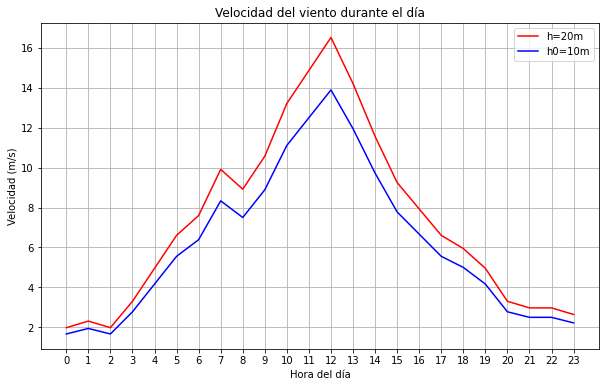

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(TablaVientos['Hora'],TablaVientos['V_h'], linewidth=1.5, color = 'red', label='h=%.0fm'%(h))
ax.plot(TablaVientos['Hora'],TablaVientos['m/s'], linewidth=1.5, color= 'blue', label='h0=%.0fm'%(h0))
ax.set_xlabel('Hora del día')
ax.set_ylabel('Velocidad (m/s)')
ax.set(xticks=np.arange(0, 24))
plt.legend()
plt.grid()
plt.title('Velocidad del viento durante el día')
plt.show()

Como podemos ver, las velocidades son mayores a la mitad del día y mínimas cuando nos acercamos a la medianoche. También podemos constatar que a partir de la fórmula de extrapolación de velocidades, éstas últimas serán mayores ante una mayor altura.

## Potencia correspondiente a cada velocidad

La siguiente pregunta de nuestro enunciado nos pide encontrar la potencia del viento a cada velocidad estimada a la altura deseada. Dicha potencia viene dada por la siguiente fórmula:

$P_{aire} = \frac{1} {2} * \rho_{aire} * A * V_{h}^{3}$

La densidad del aire, $\rho_{aire}$, tomada en cuenta en el enunciado es $1,225 Kg/m^{3}$. $A$ hace referencia al área barrida por el generador. Como dato sabemos que el radio de nuestras palas es de 2m, por lo tanto el área circular, $\pi * r^{2}$, se calcula con base en este dato. $V_{h}$ viene siendo la velocidad extrapolada a la altura del buje (centro) de nuestros aerogenerador.

Recordemos además que tenemos unas limitaciones técnicas del aerogenerador dadas por la velocidad de arranque, 3 m/s, y de desconexión de 14 m/s. Quiere decir que por debajo de la velocidad de arranque y por encima de la velocidad de desconexión no se genera potencia.

In [7]:
#Densidad de aire (kg/m3)
rho = 1.225
#Radio de palas (m)
r = 2
#Area de barrido (m2)
A = np.pi*np.power(r,2)

#Velocidad de arranque (m/s)
Varr = 3
#Velocidad de desconexión (m/s)
Vdesc = 14

In [8]:
#Definimos condiciones con los 3 escenarios:
#por debajo de V_arranque, entre V_arranque y V_desconexion y por encima de V_desconexion
condiciones = [
    (TablaVientos['V_h'] < Varr),
    (TablaVientos['V_h'] >= Varr) & (TablaVientos['V_h'] < Vdesc),
    (TablaVientos['V_h'] >= Vdesc)
]

#Definimos los respectivos valores según cada condición
#Entre V_arranque y V_desconexion se calcula la potencia, fuera de esos valores se considera nulo
valores = (0, rho * A * np.power(TablaVientos['V_h'],3) / 2, 0)

TablaVientos['P_air'] = np.select(condiciones,valores)
TablaVientos.head(24)

,Hora,Km/h,m/s,V_h,P_air
0,0,6,1.666667,1.982012,0.000000
1,1,7,1.944444,2.312347,0.000000
2,2,6,1.666667,1.982012,0.000000
3,3,10,2.777778,3.303353,277.447587
4,4,15,4.166667,4.955030,936.385605
5,5,20,5.555556,6.606706,2219.580693
6,6,23,6.388889,7.597712,3375.704787
7,7,30,8.333333,9.910059,7491.084840
8,8,27,7.500000,8.919053,5461.000848
9,9,32,8.888889,10.570730,9091.402519


La columna *P_air* expresa la potencia en vatios (W) correspondiente a cada velocidad estimada a la altura h (20m) indicada durante cada hora del día. Durante 9 horas no se genera potencia por haber valores de velocidades fuera de rango, tanto altas en el caso del mediodía, de 11h a 14h, como bajas en el caso de la noche, de 21h a 3h.

Para ayudar a comprender mejor los resultados procedemos a graficar las velocidades estimadas a la altura planificadas y la potencias asociadas

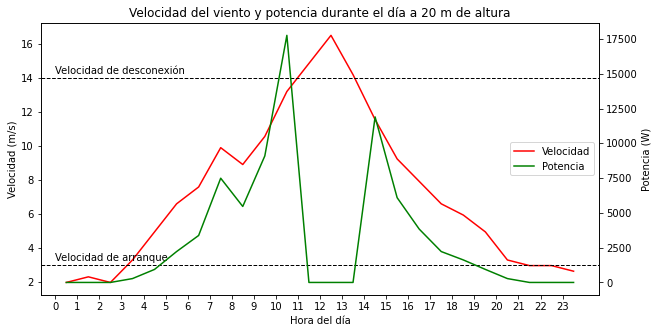

In [19]:
fig, ax1 = plt.subplots(figsize=(10,5))
plot1 = ax1.plot(TablaVientos['Hora']+0.5,TablaVientos['V_h'], linewidth=1.5, color = 'red', label='Velocidad')
ax1.axhline(y=Varr, linestyle = 'dashed', linewidth=1, color = 'black')
ax1.annotate('Velocidad de arranque', xy=(0,Varr+0.25))
ax1.axhline(y=Vdesc, linestyle = 'dashed', linewidth=1, color = 'black')
ax1.annotate('Velocidad de desconexión', xy=(0,Vdesc+0.25))
ax1.set_ylabel('Velocidad (m/s)')

ax2 = ax1.twinx()
plot2 = ax2.plot(TablaVientos['Hora']+0.5,TablaVientos['P_air'], linewidth=1.5, color= 'green', label='Potencia')
ax2.set_ylabel('Potencia (W)')

ax1.set_xlabel('Hora del día')
ax1.set(xticks=np.arange(0, 24))

#leyenda
plots = plot1 +plot2
labels = [l.get_label() for l in plots]
plt.legend(plots, labels, loc = 'center right')

plt.title('Velocidad del viento y potencia durante el día a %.0f m de altura'%(h))
plt.show()

De la gráfica anterior podemos observar que a partir de las 3h, cuando el viento supera la velocidad de arranque del aerogenerador de 3m/s, se comienza a generar potencia medida que el viento incrementa su fuerza con el paso de las horas, con algunos altibajos, llegándose a obtener una potencia de hasta 17,7 KW, con velocidades de poco más de 13 m/s. Sin embargo, al llegar las 11h el viento supera la velocidad de desconexión de 14 m/s, por lo que el aerogenerador se desconecta por seguridad y deja de producir potencia. No es sino después de las 14h cuando el viento vuelve a registrar velocidades seguras por debajo de la de desconexión, gerándose potencias de hasta 12,5 KW que van descendiendo sostenidamente a medida que pasan las horas por el descenso de la intensidad del viento hasta que llegamos a las 21h, cuando la velocidad del viento se vuelve menor que la  de arranque necesaria, 3 m/s, y por lo tanto, se pierde toda capacidad generadora de potencia.

## Calculo de la energía estimada por día

Para calcular la energía generada durante el día debemos sumar las potencias de cada hora

In [20]:
Energia_dia = TablaVientos['P_air'].sum()
print('La energía promedio generable durante un día es {} Wh/dia'.format(Energia_dia))

La energía promedio generable durante un día es 73482.27077271225 Wh/dia


Como resultado, tomando en cuenta los datos suministrados para este aerogenerador en esta localización con los vientos promedios suministrados, podríamos generar por día un promedio de **73,48 KWh por día**. Sin embargo, no hemos tomado en cuenta el coeficiente de potencia del generador, que limita considerablemente la energía generable. Como límite superior consideramos el de Betz (1919), quien lo fijó en 59,26%.

In [21]:
Energia_Betz = Energia_dia * 0.5926
print('Máxima energía generable por límite de Betz durante un día es {} Wh/dia'.format(Energia_Betz))

Máxima energía generable por límite de Betz durante un día es 43545.59365990928 Wh/dia


Tomando en cuenta el límite de Betz, nuestro aerogenerador podrá generar en esta localización un máximo de **43,546 Kwh por día**.

### Apéndice

Podemos exportar la tabla generada a un archivo externo, por ejemplo a un formato CSV (comma separated values) que es compatible con editores de texo y hojas de cálculo. Para mayor comodidad, podemos redondear los valores de algunas columnas a pocos decimales, justamente las que calculamos.

In [ ]:
TablaVientos['m/s'] = TablaVientos['m/s'].round(decimals = 3)
TablaVientos['V_h'] = TablaVientos['V_h'].round(decimals = 3)
TablaVientos['P_air'] = TablaVientos['P_air'].round(decimals = 3)

TablaVientos.head()

In [ ]:
TablaVientos.to_csv("Vientos-potencias.csv", index=False)

In [ ]:
#Ejecutar si se necesita eliminar la columna generada
TablaVientos.drop('P_air', axis = 1, inplace=True)